In [35]:
import pandas as pd
import numpy as np

In [36]:
from google.colab import drive
drive.mount('/content/drive')
airbnb = pd.read_csv('./drive/MyDrive/AB_NYC_2019.csv')
airbnb.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [37]:
airbnb.shape

(48895, 16)

In [38]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [39]:
# Removing the duplicates if any
if airbnb.duplicated().sum() != 0:
    airbnb.drop_duplicates(inplace=True)
else:
    print(None)

None


In [40]:
# Check for the null values in each column
airbnb.isnull().sum()
# ppt需要提一嘴解释一下

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [41]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [42]:
# Drop unnecessary columns(removing all NAN values)
df = airbnb.drop(['id','name','host_name','last_review','reviews_per_month'], axis=1)
# 需要drop的可以再讨论

In [43]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [44]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [45]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [46]:
df.shape

(48895, 11)

In [47]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [48]:
# Drop the "neighbourhood" column
df = df.drop(["neighbourhood","host_id"], axis=1)

# Create dummy variables for the "neighbourhood_group" and "room_type" columns
df = pd.get_dummies(df, columns=["neighbourhood_group", "room_type"])

# Preview the modified DataFrame
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,6,365,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,2,355,0,0,1,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,1,365,0,0,1,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,1,194,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,1,0,0,0,1,0,0,1,0,0


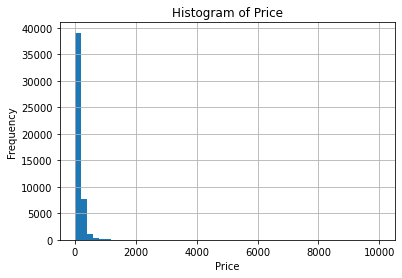

In [49]:
# Plot the distribution of the response variable
df['price'].hist(bins=50)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [50]:
df["price"] = np.log1p(df["price"])
df = df[df['price'] != 0]
print(df['price'].describe())

count    48884.000000
mean         4.737951
std          0.691782
min          2.397895
25%          4.248495
50%          4.672829
75%          5.170484
max          9.210440
Name: price, dtype: float64


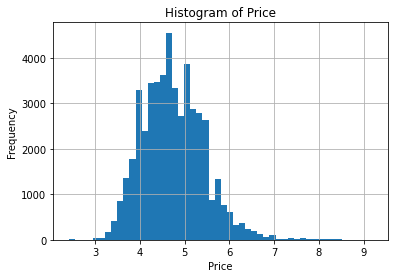

In [51]:
# Plot the histogram of the response variable
df['price'].hist(bins=50)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [52]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [54]:
# Fit a decision tree model with default hyperparameters
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train1, y_train1)

# Predict on the test set
y_pred_test = dt.predict(X_test1)

# Make predictions on the training set
y_pred_train = dt.predict(X_train1)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test1, y_pred_test)
rmse_test = np.sqrt(mse_test)

mse_train = mean_squared_error(y_train1, y_pred_train)
rmse_train = np.sqrt(mse_train)

print('Training RMSE:', rmse_train)
print('Test RMSE:', rmse_test)

Training RMSE: 0.0012367286622135619
Test RMSE: 0.6163014783981189


- This is for sure a overfitting. To address this problem, I tend to hyperparameter tuning to reduce overfitting.

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)

# Define a Decision Tree model
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameters to search over
params = {'max_depth': [2,5,10],
          'min_samples_split': [2,5,10],
          'min_samples_leaf': [10,20,30,40,50,60]}

# Define performance metric
scorer = 'neg_mean_squared_error'

# Define Grid Search with cross-validation
grid_search = GridSearchCV(dt, params, scoring=scorer, cv=5)

# Fit Grid Search on training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Best parameters: {best_params}')
print(f'Best score: {best_score}')

# Train final model on entire training set using best hyperparameters
dt_best = DecisionTreeRegressor(random_state=42, **best_params)
dt_best.fit(X_train, y_train)

# Evaluate final model on test set
y_pred = dt_best.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse1 = np.sqrt(mse)
print(f'Test RMSE: {rmse1}')

Best parameters: {'max_depth': 10, 'min_samples_leaf': 60, 'min_samples_split': 2}
Best score: -0.20890856936720342
Test RMSE: 0.46239772061940654


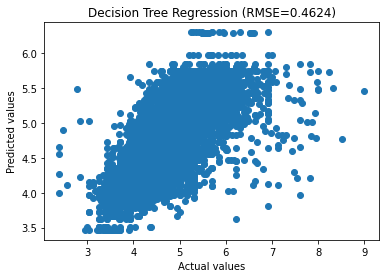

In [60]:
import matplotlib.pyplot as plt
plt.scatter(y_val, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title(f"Decision Tree Regression (RMSE={rmse1:.4f})")
plt.show()

- Improved a little bit. Let's try random forest.

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Initialize a random forest regressor
rf = RandomForestRegressor(random_state = 42,
                                n_estimators = 100,
                                min_samples_split = 10,
                                min_samples_leaf = 1,
                                bootstrap = True,
                                max_depth = 100,
                                max_features = 'sqrt')

# Fit the model on the training data
rf.fit(X_train1, y_train1)

# Predict on the test set
y_pred = rf.predict(X_test1)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test1, y_pred))
print('Test RMSE:', rmse)

Test RMSE: 0.43718390199288315


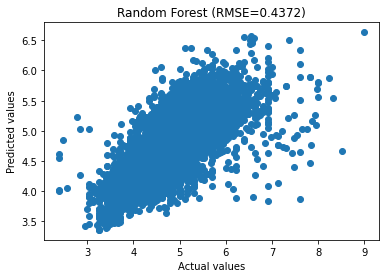

In [55]:
plt.scatter(y_val, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title(f"Random Forest (RMSE={rmse:.4f})")
plt.show()

In [61]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,5.010635,1,9,6,365,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,5.420535,1,45,2,355,0,0,1,0,0,1,0,0
2,40.80902,-73.94190,5.017280,3,0,1,365,0,0,1,0,0,0,1,0
3,40.68514,-73.95976,4.499810,1,270,1,194,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,4.394449,10,9,1,0,0,0,1,0,0,1,0,0


In [63]:
input_features = {'latitude': 40.693841, 
                  'longitude': -73.995136,
                  'neighbourhood_group_Bronx': 0,
                  'neighbourhood_group_Brooklyn': 1,
                  'neighbourhood_group_Manhattan': 0,
                  'neighbourhood_group_Queens': 0,
                  'neighbourhood_group_Staten Island': 0,
                  'room_type_Entire home/apt': 0,
                  'room_type_Private_room': 1,
                  'room_type_Shared room': 0,
                  'minimum_nights': 1,
                  'number_of_reviews': 0,
                  'calculated_host_listings_count': 1,
                  'availability_365': 365}
input_df = pd.DataFrame(input_features, index=[0])

# make predictions using the trained random forest model
predicted_price = rf.predict(input_df)

print('The predicted price is: $', np.round(np.expm1(predicted_price[0]), 2))

The predicted price is: $ 153.2


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


- Looks okay, not very ideal but not bad. Let's try tuning

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)

# Create a random forest regressor
rf = RandomForestRegressor()

# Define the hyperparameter grid to search over
params_rf = {
    'n_estimators': randint(50, 1000),
    'max_depth': randint(2, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

# Create a randomized search object
random_rf = RandomizedSearchCV(estimator=rf, param_distributions=params_rf,
                               n_iter=100, cv=5, random_state=42)

# Fit the randomized search object to the data
random_rf.fit(X_train, y_train)

# Print the best hyperparameters
print('Best Parameters:', random_rf.best_params_)
print('Best Score:', random_rf.best_score_)

KeyboardInterrupt: ignored

Took too longgg. Computational expense too high, so Pass.